In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv ')

# Missing Values

In [112]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age'>

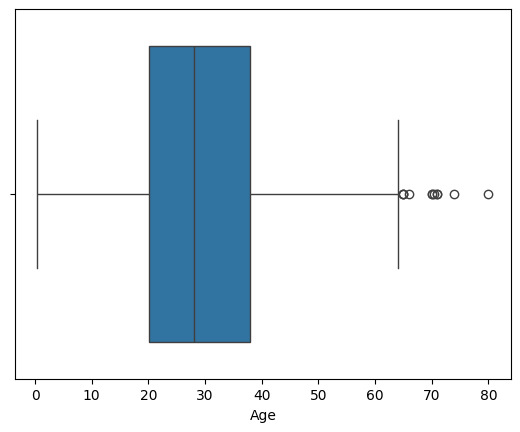

In [113]:
sns.boxplot(x=train['Age'])

<Axes: xlabel='Fare'>

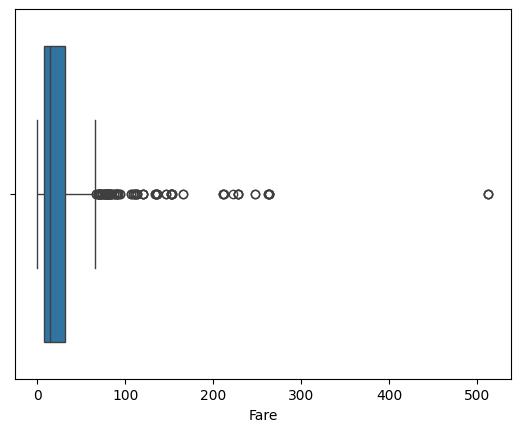

In [114]:
sns.boxplot(x=train['Fare'])

In [115]:
train['Age'].fillna(train['Age'].median(), inplace=True)

train['HasCabin'] = train['Cabin'].notnull().astype(int)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train['Fare'].fillna(train['Fare'].median(), inplace=True)

C:\Users\66959\AppData\Local\Temp\ipykernel_8488\3615974807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\66959\AppData\Local\Temp\ipykernel_8488\3615974807.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [116]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64

In [117]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [118]:
test['Age'].fillna(test['Age'].median(), inplace=True)

test['HasCabin'] = test['Cabin'].notnull().astype(int)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

C:\Users\66959\AppData\Local\Temp\ipykernel_8488\114650000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\66959\AppData\Local\Temp\ipykernel_8488\114650000.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [119]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
HasCabin         0
dtype: int64

# Outliers

<Axes: xlabel='Age'>

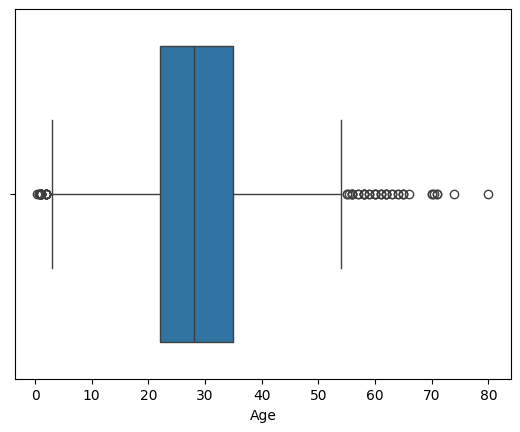

In [120]:
sns.boxplot(x=train['Age'])

In [121]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

outliers = train[(train['Fare'] < Q1 - 1.5*IQR) | (train['Fare'] > Q3 + 1.5*IQR)]


In [122]:
outliers['Fare'].min()

np.float64(66.6)

<Axes: xlabel='Fare'>

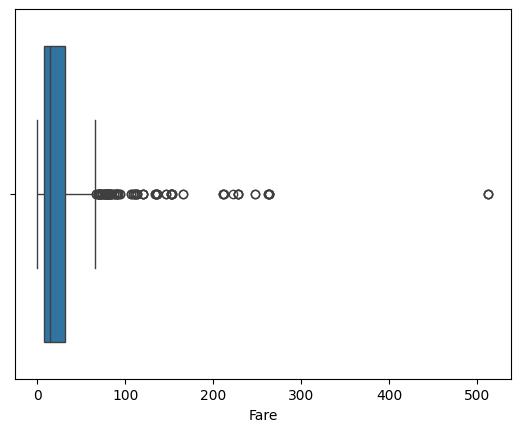

In [123]:
sns.boxplot(x=train['Fare'])

# Encode Categorical Variables

In [124]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [125]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [126]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

train = pd.get_dummies(train, columns=['Embarked'], drop_first=False)

test['Sex'] = test['Sex'].map({'male':0, 'female':1})

test = pd.get_dummies(test, columns=['Embarked'], drop_first=False)

# Drop Columns

In [127]:
train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [128]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,False,False,True
1,1,1,1,38.0,1,0,71.2833,1,True,False,False
2,1,3,1,26.0,0,0,7.9250,0,False,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,False,True
4,0,3,0,35.0,0,0,8.0500,0,False,False,True


In [130]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,False,True,False
1,3,1,47.0,1,0,7.0000,0,False,False,True
2,2,0,62.0,0,0,9.6875,0,False,True,False
3,3,0,27.0,0,0,8.6625,0,False,False,True
4,3,1,22.0,1,1,12.2875,0,False,False,True


In [132]:
train.to_csv('../data/cleaned_train.csv', index=False)
test.to_csv('../data/cleaned_test.csv', index=False)